## k临近学习
k近邻（k-Nearest，简称kNN）学习是一种常用的监督学习方法，其工作机制非常简单：给定测试样本，基于某种距离度量找出训练集中与其最靠近的k个训练样本。然后基于这k个“邻居”的信息进行预测。通常，在分类任务中可使用“投票法”，即选择这k个样本中出现最多的类别标记作为预测结果；在回归任务中可使用“平均法”，即将这k个样本的实际值输出标记的平均值作为预测结果。还可基于距离远近的加权平均或加权投票，距离越近的样本权重越大。

与先前介绍的学习方法相比，k近邻学习有一个明显的不同之处，它似乎没有显示的训练过程。事实上，它是“懒惰学习”（lazy learning）的著名代表，此类学习技术在训练阶段仅仅是将样本存储起来，训练开销为零，待收到测试样本后再进行处理；相应的，那些在训练阶段就对样本进行学习处理的方法，称为“急切学习”（eager learning）。

k是一个重要参数，当k取不同值时，分类结果会有显著不同。另一方面，若采用不同的距离计算方式，则找出的“近邻”可能有显著差别，从而也会导致分类结果有显著不同。
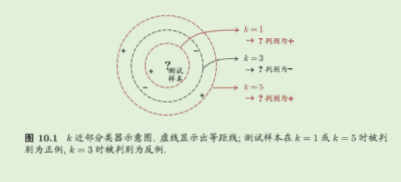

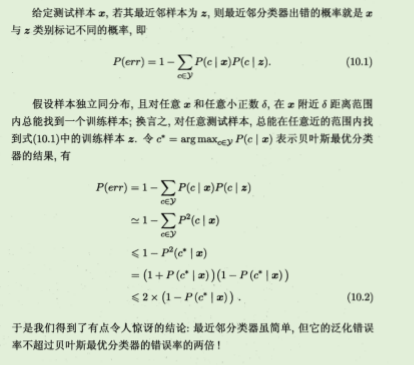

## 低维嵌入
假设任意测试样本x附近任意小的δ距离范围内总能找到一个训练样本，即训练样本的采样密度足够大，或称为“密采样”（dense sample）。然而，这个假设在现实任务中通常很难满足。此外，许多学习方法都涉及距离计算，而高维空间会给距离计算带来很大麻烦，例如当维数很高时，甚至连计算内积都不再容易。

事实上，在高维情形下出现的数据样本稀疏，计算距离困难等问题，是所有机器学习方法共同面临的严重障碍，被称为“维数灾难”（curse of dimensionality）。


缓解维数灾难的一个重要途径是降维（dimension reduction），亦称“维数简约”，即通过某种数学变换将原始高纬度属性空间转变为一个低维“子空间”（subspace），在这个子空间中样本密度大幅提高，计算距离也变得更为容易。为什么能进行降维？这是因为在很多时候，人们人们观测或收集到的数据样本虽是高维的，但与学习任务密切相关的也许仅是某个低维分布，即高维空间的一个底维“嵌入”（embedding）。
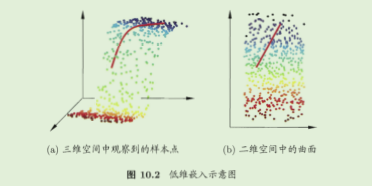





若要求原始空间中的样本之间距离在低维空间中得以保持，即得到“多维缩放”（Multiple Dimensional Scaling，简称MDS）这样一种经典的降维方法。

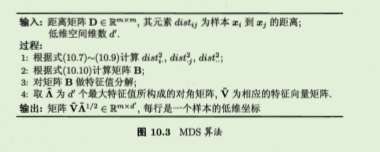



对降维效果的评估，通常是比较降维前后学习器的性能，若性能有所提高则认为降维起到了作用。若维数降低到二维或三维，则可通过可视化技术来直观的判断降维效果。


## 主成分分析
主成分分析（Principal Component Analysis，简称PCA）是最常用的一种降维方法。
对于正交属性空间中的样本点，如何用一个超平面（直线的高维推广）对所有样本进行恰当的表达？
超平面应该具有：
1. 最近重构性：样本点到这个超平面的距离都足够近
2. 最大可分性：样本点在这个超平面上的投影尽可能分开

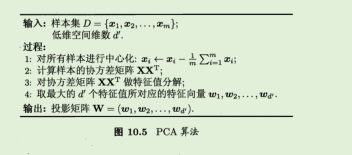
PCA仅需保留W与与样本的均值向量即可通过简单的向量减法和矩阵向量乘法将样本投影到低维空间中。显然，低维空间与原始高维空间必有不同，因为对应于最小的d-d’个特征值的特征向量被舍弃了，这是降维导致的结果。但舍弃这样的信息往往是必要的：一方面，舍弃这部分信息之后能使样本的采样密度增大，这正是降维的重要动机；
另一方面，当数据受到噪声影响时，最小的特征值所对应的特征向量往往与噪声有关，将它们舍弃能在一定程度上起到去噪的效果。


## 核化线性降维
线性降维方法假设从高维空间到低维空间的函数映射是线性的，然而，在不少实际任务中，可能需要非线性映射才能找到恰当的低维嵌入。
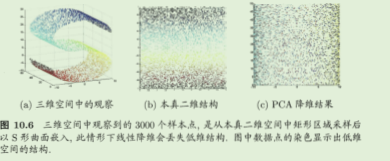

非线性降维的一种常用方法，是基于核技巧对线性降维方法进行”核化“（kernelized）。

## 流形学习
流形学习（manifold learning）是一类借鉴了拓扑流形概念的降维方法。”流形“是在局部与欧氏空间同胚的空间，换言之，它在局部具有欧氏空间的性质，能用欧氏距离来进行距离计算。这给降维方法带来了很大的启发。若低维流形嵌入到高维空间中，则数据样本在高维空间的分布虽然看上去非常复杂，但在局部上仍具有欧氏空间的性质，因此，可以容易的在局部建立降维映射关系，然后，再设法将局部映射关系推广到全局。当维数被降至二维或三维时，能对数据进行可视化展示，因此流形学习也可被用于可视化。


### 等度量映射
等度量映射的基本出发点，是认为低维流形嵌入到高维空间之后，直接在高维空间中计算直线距离具有误导性，因为高维空间中的直线距离在低维嵌入流形上是不可达的。低维嵌入流形上两点间的距离称为测地线距离。
那么，如何计算测地线距离呢？这时我们可利用流形在局部上与欧氏空间同胚这个性质，对每个点基于欧氏距离找出其近邻点，然后就能建立一个近邻连接图，图中近邻点之间存在连接，而非近邻点之间不存在连接， 于是，计算两点之间测地线距离的问题就转变为计算近邻连接图上两点之间的最短路径问题。在近邻连接图上计算两点间的最短路径可采用著名的 Dijkstra 算法或 Floyd 算法，在得到任意两点的距离之后，就可通过 10.2 节介绍的 MDS 方法来获得样本点在低维空间中的坐标。 Isomap 算法描述如下
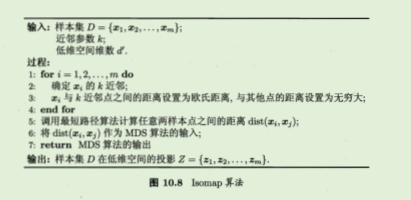
对近邻图的构建通常有两种做法，一种是指定近邻点个数，例如欧氏距离最近的 k 个点为近邻点，这样得到的近邻图称为 k 近邻图;另一种是指定距离阈值ε ，距离小于 ε 的点被认为是近邻点，这样得到的近邻图称为 ε 近邻图。

### 局部线性嵌入
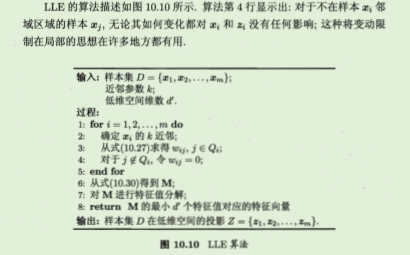

## 度量学习
在机器学习中，对高维数据进行降维的主要目的是希望找到一个合适的低维空间，在此空间中进行学习能比原始空间性能更好。事实上，每个空间对应了在样本属性上定义的一个距离度量，而寻找合适的空间，实质上就是在寻找一个合适的距离度量。直接尝试”学习“出一个合适的距离度量，就是度量学习（metric learning）的基本动机。
